# Análise de dados de jogadores da NBA

Isabela Marinho Ribeiro (imr)

Lucas e Silva de Souza (lss8)

## Glossário das features

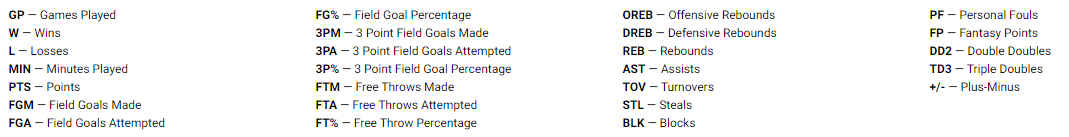

### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(10)

from sklearn.preprocessing import MinMaxScaler

### Importando o dataset

Importamos o dataset principal, e um secundário aonde vamos fazer as modificações e análises

In [ ]:
df = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [ ]:
df_main = pd.read_csv('NBA_Players_Stats.csv', sep=';')

In [ ]:
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,AJ Griffin,ATL,20,20,8,12,170.7,48,18,62,...,18,5,8,1,2,6,78,0,0,-51
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333,471,1100,...,272,247,112,96,26,179,2284,1,0,127
2,Bruno Fernando,ATL,25,45,20,25,682.3,282,109,187,...,193,46,44,25,28,107,698,0,0,-96
3,Clint Capela,ATL,29,73,33,40,1883.1,836,353,618,...,776,91,74,43,106,164,2277,38,0,-17
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891,304,663,...,222,87,83,40,16,146,1373,3,0,-49


In [ ]:
df.shape

(571, 29)

### Definição de tipos

Aqui verificamos que temos duas colunas do tipo object, a "PLAYER" que contém o nome dos jogadores, e a "TEAM", que contém os times ao qual os jogadores fazem parte.

In [ ]:
df.dtypes

PLAYER     object
TEAM       object
AGE         int64
GP          int64
W           int64
L           int64
MIN       float64
PTS         int64
FGM         int64
FGA         int64
FG%       float64
3PM         int64
3PA         int64
3P%       float64
FTM         int64
FTA         int64
FT%       float64
OREB        int64
DREB        int64
REB         int64
AST         int64
TOV         int64
STL         int64
BLK         int64
PF          int64
FP          int64
DD2         int64
TD3         int64
+/-         int64
dtype: object

Vamos criar uma nova coluna chamada "TEAMID", para facilitar análises futuras. Não achamos necessário alterar a coluna com o nome dos jogadores.

In [ ]:
df['TEAMID'] = df['TEAM'].astype('category')

In [ ]:
df['TEAMID'] = df['TEAMID'].cat.codes

In [ ]:
df[['TEAM','TEAMID']]

,TEAM,TEAMID
0,ATL,0
1,ATL,0
2,ATL,0
3,ATL,0
4,ATL,0
...,...,...
566,WAS,29
567,WAS,29
568,WAS,29
569,WAS,29


### Limpeza de dados

#### Remoção aleatória de dados para tratar dados ausentes

Como não temos nenhum dado ausente, vamos deletar dados aleatórios da coluna "PTS" para usar tecnicas de inputação depois.

In [ ]:
df.isnull().any()

PLAYER    False
TEAM      False
AGE       False
GP        False
W         False
L         False
MIN       False
PTS       False
FGM       False
FGA       False
FG%       False
3PM       False
3PA       False
3P%       False
FTM       False
FTA       False
FT%       False
OREB      False
DREB      False
REB       False
AST       False
TOV       False
STL       False
BLK       False
PF        False
FP        False
DD2       False
TD3       False
+/-       False
TEAMID    False
dtype: bool

In [ ]:
nan_indices = np.random.choice(df.index, 30, replace=False)
df.loc[nan_indices, 'PTS'] = np.nan

nulldf = df[df['PTS'].isna()]
nulldf.PTS

47    NaN
69    NaN
92    NaN
102   NaN
152   NaN
172   NaN
194   NaN
214   NaN
227   NaN
228   NaN
253   NaN
264   NaN
295   NaN
299   NaN
317   NaN
375   NaN
378   NaN
407   NaN
419   NaN
440   NaN
460   NaN
467   NaN
511   NaN
525   NaN
531   NaN
535   NaN
552   NaN
554   NaN
556   NaN
568   NaN
Name: PTS, dtype: float64

Aqui nós geramos uma coluna "PPS" (Points Per Game), pois é um dado interessante para se analisar, e também é mais uma coisa que teremos que inputar nas linhas onde apagamos dados da coluna "PTS".

In [ ]:
df['PPG'] = df['PTS']/df['GP']
df.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


In [ ]:
df.PPG.describe()

count    541.000000
mean       8.384144
std        6.846162
min        0.000000
25%        3.326531
50%        6.266667
75%       11.567901
max       34.692308
Name: PPG, dtype: float64

In [ ]:
df.PTS.describe()

count     541.000000
mean      489.007394
std       515.773012
min         0.000000
25%        69.000000
50%       290.000000
75%       784.000000
max      2370.000000
Name: PTS, dtype: float64

#### Detecção de registros replicados

Verificamos que não existem registros duplicados

In [ ]:
df[df.duplicated()].sort_values("PLAYER").head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG


#### Tratamento de dados ausentes

Aqui duplicamos o dataset, para fazer uma comparação entre a inputação de dados usando média, mediana e KNN mais a frente.

In [ ]:
df2 = df.copy()
df3 = df.copy()

In [ ]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


Aqui nós fazemos a inputação de dados, usando a média, mediana e KNN como parâmetros (uma em cada DF)

##### MEDIA

In [ ]:
def generatePTS_values(row):
  return round(df.PPG.mean() * row['GP'])

df.loc[df['PTS'].isna(), 'PTS'] = df[df['PTS'].isna()].apply(generatePTS_values,axis=1)

In [ ]:
df = df.fillna(df.PPG.mean())

In [ ]:
df.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


##### MEDIANA

In [ ]:
def generatePTS2_values(row):
  return round(df2.PPG.median() * row['GP'])

df2.loc[df2['PTS'].isna(), 'PTS'] = df2[df2['PTS'].isna()].apply(generatePTS2_values,axis=1)

In [ ]:
df2 = df2.fillna(df2.PPG.mean())

In [ ]:
df2.head(50)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
0,AJ Griffin,ATL,20,20,8,12,170.7,48.0,18,62,...,8,1,2,6,78,0,0,-51,0,2.400000
1,Bogdan Bogdanovic,ATL,31,79,35,44,2401.4,1333.0,471,1100,...,112,96,26,179,2284,1,0,127,0,16.873418
2,Bruno Fernando,ATL,25,45,20,25,682.3,282.0,109,187,...,44,25,28,107,698,0,0,-96,0,6.266667
3,Clint Capela,ATL,29,73,33,40,1883.1,836.0,353,618,...,74,43,106,164,2277,38,0,-17,0,11.452055
4,De'Andre Hunter,ATL,26,57,26,31,1681.1,891.0,304,663,...,83,40,16,146,1373,3,0,-49,0,15.631579
5,Dejounte Murray,ATL,27,78,34,44,2783.3,1753.0,672,1463,...,201,111,24,138,3209,20,1,-154,0,22.474359
6,Dylan Windler,ATL,27,17,9,8,108.4,43.0,15,30,...,2,2,0,6,81,0,0,-16,0,2.529412
7,Garrison Mathews,ATL,27,66,29,37,992.1,325.0,103,226,...,19,20,8,115,556,0,0,-97,0,4.924242
8,Jalen Johnson,ATL,22,56,27,29,1888.9,896.0,359,702,...,101,67,47,133,2027,19,1,-76,0,16.000000
9,Kobe Bufkin,ATL,20,17,8,9,196.0,81.0,34,92,...,10,7,5,20,187,0,0,-35,0,4.764706


#### KNN Imputer

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

df3 = df3.drop(['PLAYER', 'TEAM'], axis=1)

In [ ]:
df3_v2 = df3

In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputed_data = imputer.fit_transform(df3)

In [ ]:
df3 = pd.DataFrame(imputed_data, columns=df3_v2.columns)

In [ ]:
df3['PLAYER'] = df_main['PLAYER']
df3['TEAM'] = df_main['TEAM']

In [ ]:
df3.head(50)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG,PLAYER,TEAM
0,20.0,20.0,8.0,12.0,170.7,48.0,18.0,62.0,29.0,10.0,...,2.0,6.0,78.0,0.0,0.0,-51.0,0.0,2.400000,AJ Griffin,ATL
1,31.0,79.0,35.0,44.0,2401.4,1333.0,471.0,1100.0,42.8,240.0,...,26.0,179.0,2284.0,1.0,0.0,127.0,0.0,16.873418,Bogdan Bogdanovic,ATL
2,25.0,45.0,20.0,25.0,682.3,282.0,109.0,187.0,58.3,0.0,...,28.0,107.0,698.0,0.0,0.0,-96.0,0.0,6.266667,Bruno Fernando,ATL
3,29.0,73.0,33.0,40.0,1883.1,836.0,353.0,618.0,57.1,0.0,...,106.0,164.0,2277.0,38.0,0.0,-17.0,0.0,11.452055,Clint Capela,ATL
4,26.0,57.0,26.0,31.0,1681.1,891.0,304.0,663.0,45.9,117.0,...,16.0,146.0,1373.0,3.0,0.0,-49.0,0.0,15.631579,De'Andre Hunter,ATL
5,27.0,78.0,34.0,44.0,2783.3,1753.0,672.0,1463.0,45.9,201.0,...,24.0,138.0,3209.0,20.0,1.0,-154.0,0.0,22.474359,Dejounte Murray,ATL
6,27.0,17.0,9.0,8.0,108.4,43.0,15.0,30.0,50.0,13.0,...,0.0,6.0,81.0,0.0,0.0,-16.0,0.0,2.529412,Dylan Windler,ATL
7,27.0,66.0,29.0,37.0,992.1,325.0,103.0,226.0,45.6,85.0,...,8.0,115.0,556.0,0.0,0.0,-97.0,0.0,4.924242,Garrison Mathews,ATL
8,22.0,56.0,27.0,29.0,1888.9,896.0,359.0,702.0,51.1,71.0,...,47.0,133.0,2027.0,19.0,1.0,-76.0,0.0,16.000000,Jalen Johnson,ATL
9,20.0,17.0,8.0,9.0,196.0,81.0,34.0,92.0,37.0,9.0,...,5.0,20.0,187.0,0.0,0.0,-35.0,0.0,4.764706,Kobe Bufkin,ATL


##### Avaliação da inputação

Aqui nós usamos o dataset principal e os indices das linhas que foram deletadas para resgatar o valor real, e comparamos com os valores que inputamos com a média, mediana e KNN para analisar a taxa de erro.

In [ ]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df.loc[nan_indices, 'PTS'].values

# Calculate the mean error
mean_error = np.mean(np.abs(real_values - calculated_values))

mean_error

205.2

In [ ]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df2.loc[nan_indices, 'PTS'].values

# Calculate the median error
median_error = np.mean(np.abs(real_values - calculated_values))

median_error

233.43333333333334

In [ ]:
# Extract the real and calculated values
real_values = df_main.loc[nan_indices, 'PTS'].values
calculated_values = df3.loc[nan_indices, 'PTS'].values

# Calculate the knn error
knn_error = np.mean(np.abs(real_values - calculated_values))

knn_error

47.8

As inputações com KNN resultaram na menor taxa de erro (47.8). Sendo assim, decidimos prosseguir a análise com o resultado da inputação dela.

### Normalização

Como quase todos os dados tem valores positivos, normalizamos entre 0 e 1, e removemos as colunas "PLAYER", "TEAM" e "TEAMID" da normalização pois não representam valores numéricos aserem analisados. Salvamos essa normalização em um novo dataset.

In [ ]:
# TODO: definir se a escala é entre -1 e 1 ou 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df_normalized = df3.drop(['PLAYER', 'TEAM', 'TEAMID'], axis=1)

In [ ]:
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

In [ ]:
df_normalized['PLAYER'] = df3['PLAYER']
df_normalized['TEAM'] = df3['TEAM']
df_normalized['TEAMID'] = df3['TEAMID']

In [ ]:
df_normalized.head(10)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,BLK,PF,FP,DD2,TD3,+/-,PPG,PLAYER,TEAM,TEAMID
0,0.05,0.228916,0.125000,0.184615,0.056896,0.020253,0.021505,0.037530,0.388220,0.028011,...,0.007874,0.023622,0.016923,0.000000,0.000000,0.442586,0.069180,AJ Griffin,ATL,0.0
1,0.60,0.939759,0.546875,0.676923,0.803474,0.562447,0.562724,0.665860,0.572959,0.672269,...,0.102362,0.704724,0.495552,0.012987,0.000000,0.577947,0.486373,Bogdan Bogdanovic,ATL,0.0
2,0.30,0.530120,0.312500,0.384615,0.228120,0.118987,0.130227,0.113196,0.780455,0.000000,...,0.110236,0.421260,0.151443,0.000000,0.000000,0.408365,0.180636,Bruno Fernando,ATL,0.0
3,0.50,0.867470,0.515625,0.615385,0.630008,0.352743,0.421744,0.374092,0.764391,0.000000,...,0.417323,0.645669,0.494033,0.493506,0.000000,0.468441,0.330104,Clint Capela,ATL,0.0
4,0.35,0.674699,0.406250,0.476923,0.562402,0.375949,0.363202,0.401332,0.614458,0.327731,...,0.062992,0.574803,0.297895,0.038961,0.000000,0.444106,0.450578,De'Andre Hunter,ATL,0.0
5,0.40,0.927711,0.531250,0.676923,0.931290,0.739662,0.802867,0.885593,0.614458,0.563025,...,0.094488,0.543307,0.696246,0.259740,0.038462,0.364259,0.647820,Dejounte Murray,ATL,0.0
6,0.40,0.192771,0.140625,0.123077,0.036045,0.018143,0.017921,0.018160,0.669344,0.036415,...,0.000000,0.023622,0.017574,0.000000,0.000000,0.469202,0.072910,Dylan Windler,ATL,0.0
7,0.40,0.783133,0.453125,0.569231,0.331805,0.137131,0.123059,0.136804,0.610442,0.238095,...,0.031496,0.452756,0.120634,0.000000,0.000000,0.407605,0.141940,Garrison Mathews,ATL,0.0
8,0.15,0.662651,0.421875,0.446154,0.631949,0.378059,0.428913,0.424939,0.684070,0.198880,...,0.185039,0.523622,0.439792,0.246753,0.038462,0.423574,0.461197,Jalen Johnson,ATL,0.0
9,0.05,0.192771,0.125000,0.138462,0.065364,0.034177,0.040621,0.055690,0.495315,0.025210,...,0.019685,0.078740,0.040573,0.000000,0.000000,0.454753,0.137342,Kobe Bufkin,ATL,0.0


### Discretização

Aqui discretizamos os valores da coluna "PPG" normalizada, e salvamos numa nova coluna "PPG_DIS"

In [ ]:
df3['PPG_DIS'] = pd.cut(df3['PPG'],10)

In [ ]:
df3['PPG_DIS'].value_counts()

PPG_DIS
(3.469, 6.938]      162
(-0.0347, 3.469]    148
(6.938, 10.408]      92
(10.408, 13.877]     61
(13.877, 17.346]     40
(17.346, 20.815]     25
(20.815, 24.285]     23
(24.285, 27.754]     15
(27.754, 31.223]      3
(31.223, 34.692]      2
Name: count, dtype: int64

In [ ]:
df3['PPG'].describe()

count    571.000000
mean       8.391931
std        6.767414
min        0.000000
25%        3.382308
50%        6.440000
75%       11.509978
max       34.692308
Name: PPG, dtype: float64

### Análise de Outliers

No caso do nosso dataset, os outliers não informam dados "incorretos", mas sim jogadores fora da curva em determinada categoria. Por isso, é uma análise muito útil para recrutamento.

#### Outliers Univariados (REB)

Aqui analisamos a coluna de Rebotes e encontramos os jogadores que se destacam nessa categoria.

In [ ]:
df3['REB'].describe()

count     571.000000
mean      187.273205
std       185.919268
min         0.000000
25%        37.000000
50%       141.000000
75%       273.000000
max      1120.000000
Name: REB, dtype: float64

<Axes: >

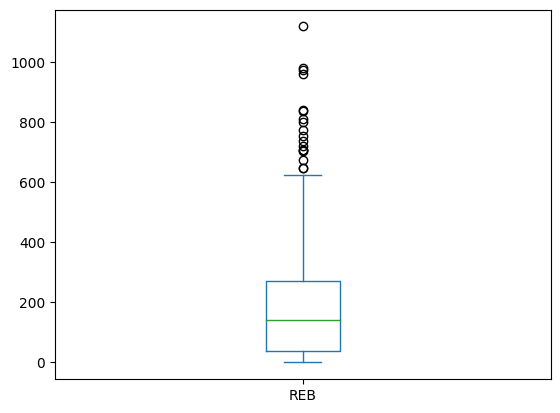

In [ ]:
df3['REB'].plot.box()

<Axes: >

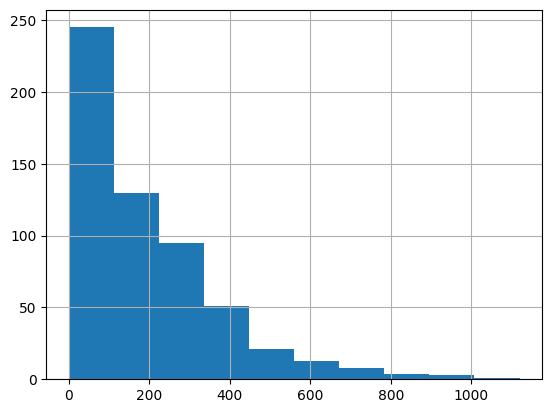

In [ ]:
df3['REB'].hist()

In [ ]:
from numpy import abs
mad = abs(df3['REB'] - df3['REB'].median()).median()*(1/0.6745)
print(mad)

167.53150481838398


In [ ]:
(df3['REB']-df3['REB'].mean()).abs().mean()

142.34509156823836

<Axes: >

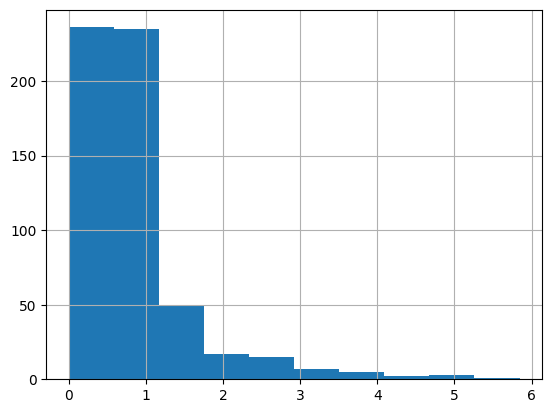

In [ ]:
(abs(df3['REB']-df3['REB'].median())/mad).hist()

In [ ]:
df3[abs(df3['REB']-df3['REB'].median())/mad > 3.5][['PLAYER', 'TEAM', 'REB']].sort_values(by=['REB'], ascending = False)

,PLAYER,TEAM,REB
480,Domantas Sabonis,SAC,1120.0
340,Rudy Gobert,MIN,982.0
143,Nikola Jokic,DEN,976.0
242,Anthony Davis,LAL,961.0
314,Giannis Antetokounmpo,MIL,841.0
448,Jusuf Nurkic,PHX,837.0
104,Jarrett Allen,CLE,811.0
87,Nikola Vucevic,CHI,801.0
3,Clint Capela,ATL,776.0
511,Victor Wembanyama,SAS,755.0


#### Outliers Bivariados (PPG)

Aqui analisamos a categoria de Pontos por Jogo, para encontrar os maiores pontuadores da liga.

In [ ]:
df3['PPG'].describe()

count    571.000000
mean       8.391931
std        6.767414
min        0.000000
25%        3.382308
50%        6.440000
75%       11.509978
max       34.692308
Name: PPG, dtype: float64

<Axes: >

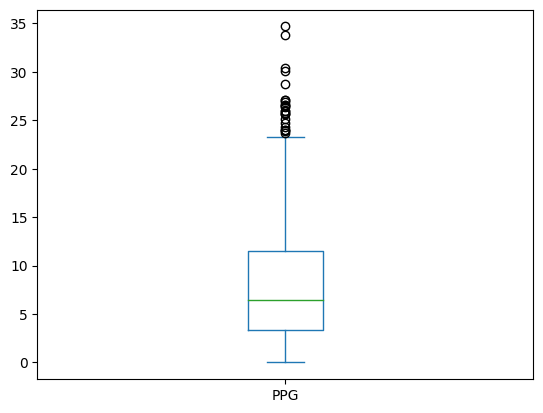

In [ ]:
df3['PPG'].plot.box()

<Axes: >

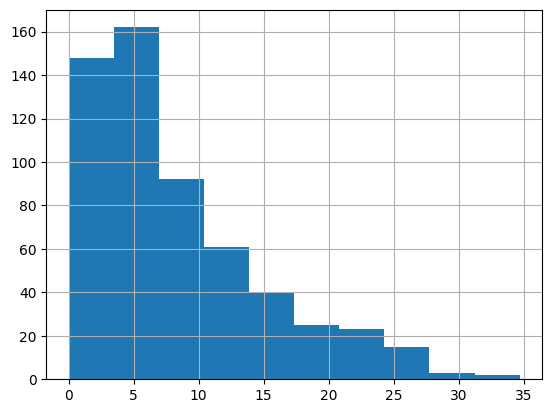

In [ ]:
df3['PPG'].hist()

In [ ]:
from numpy import abs
mad2 = abs(df3['PPG'] - df3['PPG'].median()).median()*(1/0.6745)
print(mad2)

5.495428712626637


In [ ]:
(df3['PPG']-df3['PPG'].mean()).abs().mean()

5.345546853869504

<Axes: >

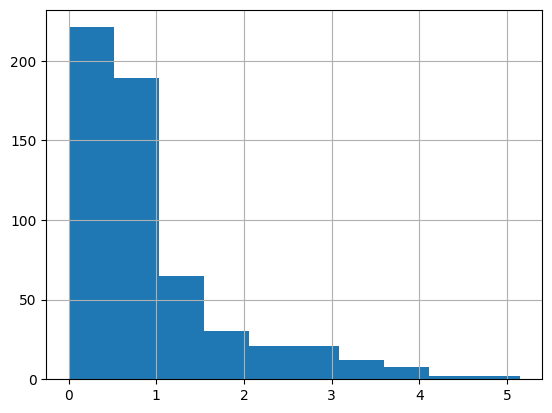

In [ ]:
(abs(df3['PPG']-df3['PPG'].median())/mad2).hist()

In [ ]:
df3[abs(df3['PPG']-df3['PPG'].median())/mad2 > 3.5][['PLAYER', 'TEAM', 'PPG']].sort_values(by=['PPG'], ascending = False)

,PLAYER,TEAM,PPG
426,Joel Embiid,PHI,34.692308
124,Luka Doncic,DAL,33.857143
314,Giannis Antetokounmpo,MIL,30.438356
398,Shai Gilgeous-Alexander,OKC,30.053333
370,Jalen Brunson,NYK,28.727273
449,Kevin Durant,PHX,27.093333
441,Devin Booker,PHX,27.073529
42,Jayson Tatum,BOS,26.851351
98,Donovan Mitchell,CLE,26.600000
479,De'Aaron Fox,SAC,26.567568


### Estatísticas descritivas

In [ ]:
df3.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,TEAMID,PPG
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,25.992995,46.120841,23.187391,22.933450,1036.456042,490.388792,181.108581,381.847636,44.952189,55.119089,...,55.462347,32.077058,22.119089,80.605954,993.654991,3.919440,0.238179,0.870403,14.560420,8.391931
std,4.261202,25.545716,16.301811,14.130437,847.824939,509.440524,185.995563,382.715110,11.345487,63.577138,...,57.291957,28.600473,28.864289,64.193818,941.932933,9.409429,1.849423,173.831439,8.600149,6.767414
min,19.000000,1.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-633.000000,0.000000,0.000000
25%,23.000000,22.000000,8.000000,12.000000,221.500000,75.500000,29.000000,66.500000,40.750000,3.000000,...,9.000000,7.000000,3.000000,19.500000,176.500000,0.000000,0.000000,-74.000000,7.000000,3.382308
50%,25.000000,51.000000,22.000000,24.000000,877.100000,302.000000,114.000000,240.000000,45.200000,28.000000,...,36.000000,26.000000,12.000000,72.000000,722.000000,0.000000,0.000000,-9.000000,14.000000,6.440000
75%,28.000000,69.000000,37.000000,32.000000,1782.400000,780.000000,294.500000,609.500000,50.000000,87.500000,...,87.000000,51.000000,33.000000,128.000000,1592.500000,3.000000,0.000000,51.000000,22.000000,11.509978
max,39.000000,84.000000,64.000000,65.000000,2988.600000,2370.000000,837.000000,1652.000000,74.700000,357.000000,...,282.000000,150.000000,254.000000,254.000000,4609.000000,77.000000,26.000000,682.000000,29.000000,34.692308


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Aqui observamos a distribuição dos valores das variáveis por coluna, onde podemos analisar a simetria das distribuições e a dispersão dos valores.

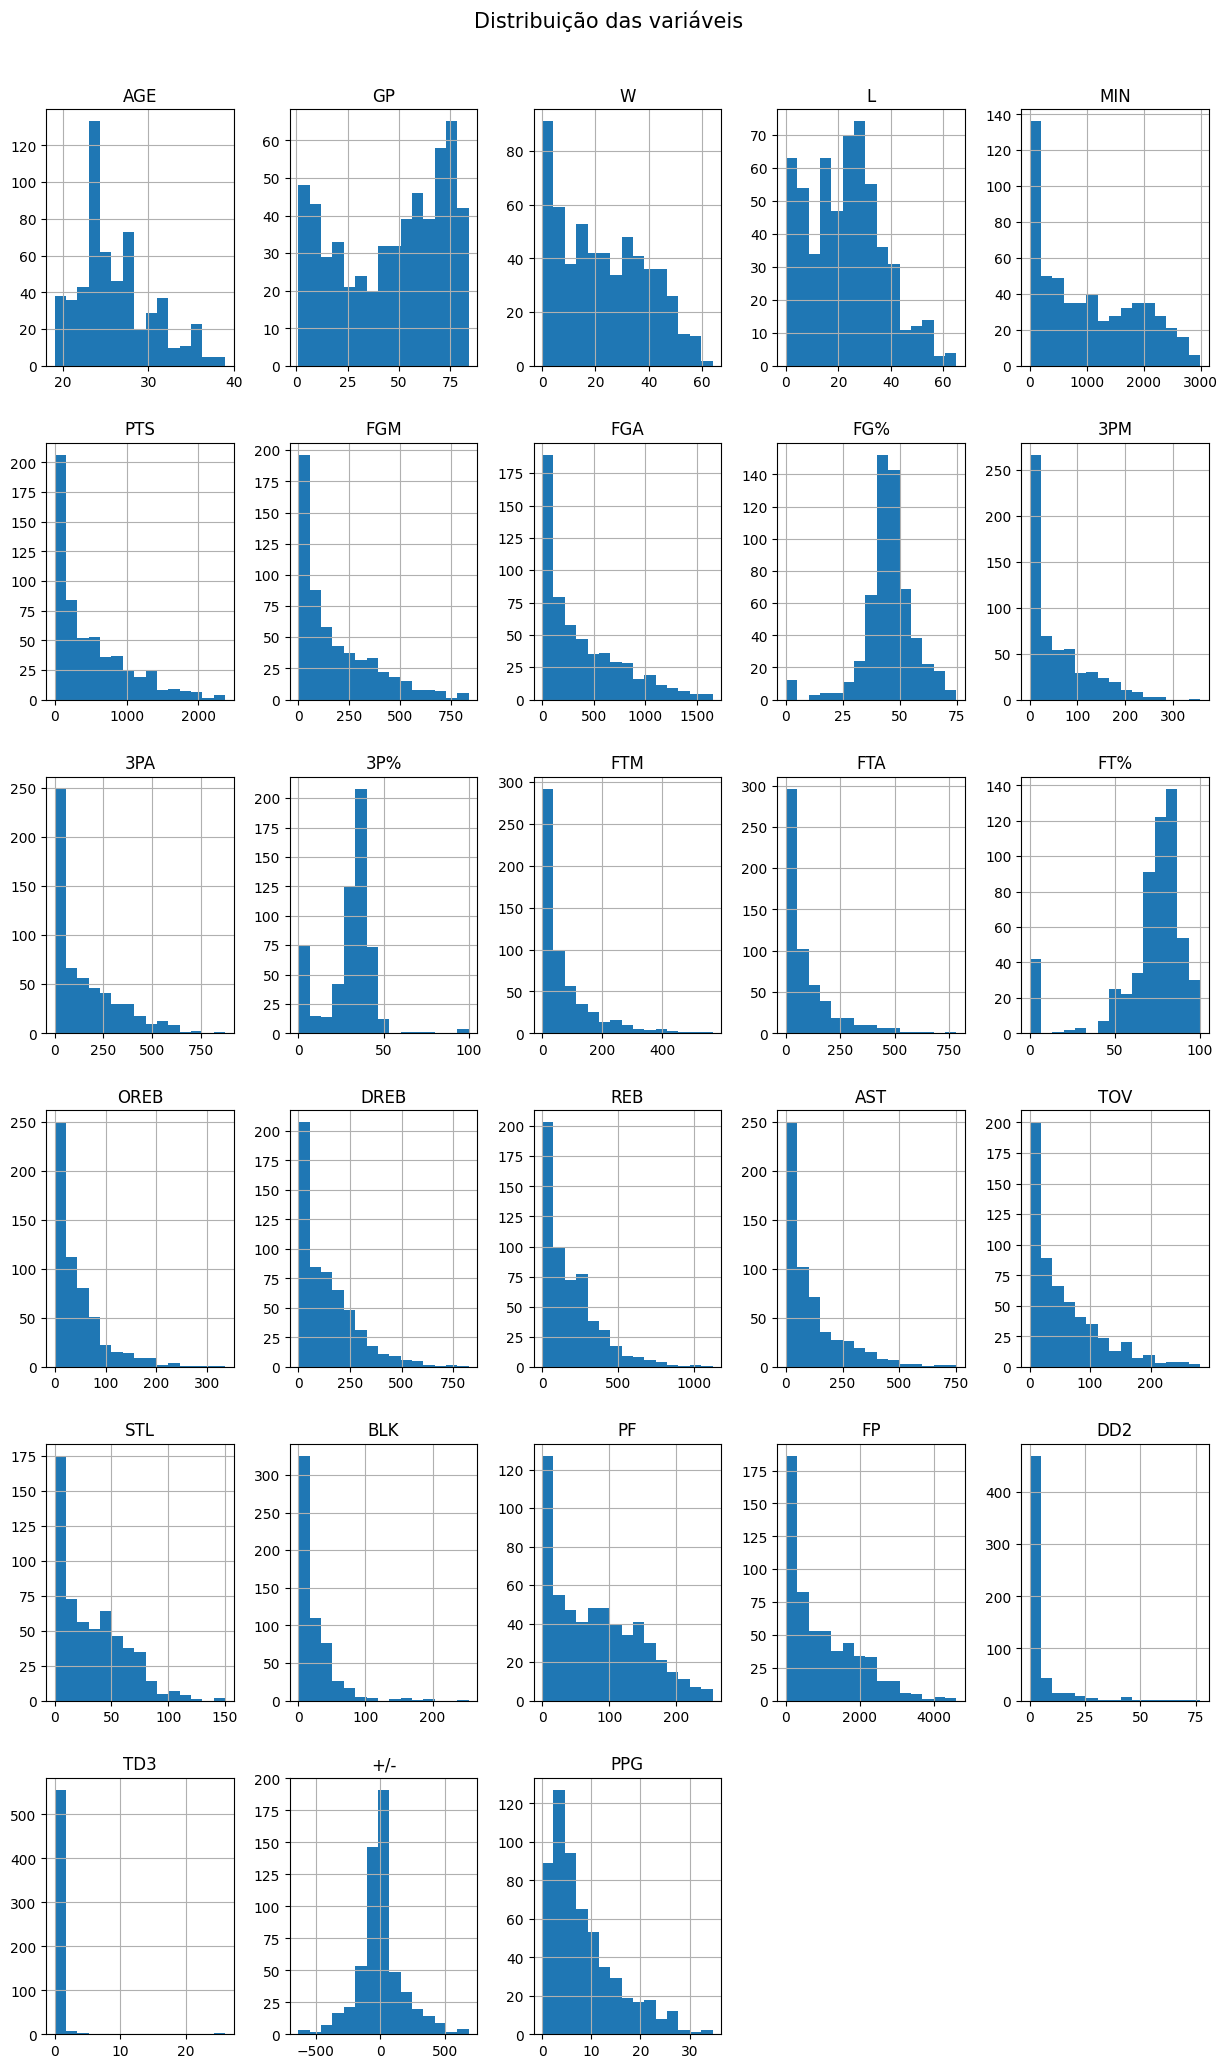

In [ ]:
df3.drop(['TEAMID'], axis=1).hist(bins=15, figsize=(15, 25))
plt.suptitle('Distribuição das variáveis', y=0.92, fontsize=15)
plt.show()

A maioria das variáveis mostra uma assimetria a direita, o que pode indicar uma forte presença de outliers. Essa característica implica numa necessidade de normalização dos dados, como feito anteriormente, para uso em modelagens utilizando machine learning.

No cenário atual de análise de dados de jogadores de NBA, a presença de outliers é importante para avaliar padrões nas características dos jogadores comuns e que se destacam. Por exemplo, no gráfico AGE vemos que a maioria dos jogadores está na faixa de idade entre 20 e 30 anos. Se quisermos analisar o comportamento de jogadores mais velhos, podemos focar a análise nos outliers desse grupo.

A distribuição mais próxima do normal, em questão, é a da variável +/- (plus minus). Ela mostra que a maioria dos jogadores tem um impacto neutro ou próximo da média no placar do jogo, com poucos jogadores mostrando um impacto muito positivo ou negativo. Essa análise pode ajudar no ajuste de estratégias da equipe, de forma a direcionar a escolha dos jogadores para maximizar a média de impacto do jogo.

Aqui temos o boxplot de cada coluna, onde identificamos as medianas, os quartis e os outliers.

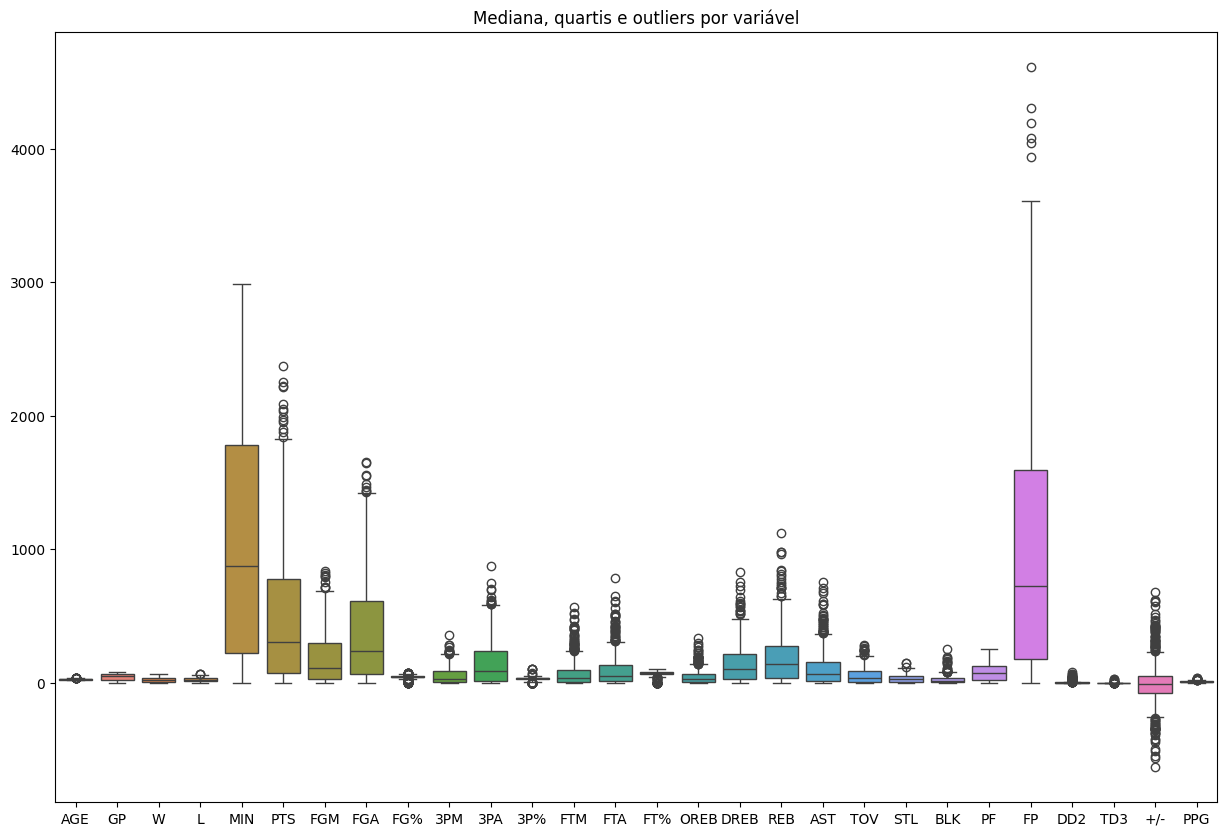

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df3.drop(['TEAMID'], axis=1))
plt.title('Mediana, quartis e outliers por variável')
plt.show()

Analisando os boxplots anteriores, vemos duas variáveis em destaque: FP (fantasy points) e MIN (minutes played).

Com relação a FP, ela é uma métrica calculada a partir de vários dados estatísticos dos jogadores, como pontos, rebotes, assistências etc. A distribuição larga mostra uma grande variabilidade no desempenho dos jogadores, com o Q3 ligeiramente maior que o Q1, o que soma mais jogadores acima da mediana. O alto limite superior mostra uma grande variabilidade de dados acima do Q3 e os jogadores acima desse limite podem ser considerados com desempenhos excepcionais. Podemos ver que não existem jogadores abaixo do limite inferior, ou seja, nenhum jogador tem performance extremamente baixa.

Já com relação ao MIN, vemos que a distribuição é quase simétrica e sem a presença de outliers, o que faz sentido visto que os jogos têm tempos totais padrão. A distribuição tende a uma assimetria a direita, o que indica que há um número considerável de jogadores que jogam um pouco mais do que a mediana, mas há poucos jogadores que jogam muito mais minutos. A falta de outliers pode indicar que a rotação entre os jogadores é feita de forma balanceada, com uma carga de trabalho sem extremos.

In [ ]:
df3.dtypes

AGE         float64
GP          float64
W           float64
L           float64
MIN         float64
PTS         float64
FGM         float64
FGA         float64
FG%         float64
3PM         float64
3PA         float64
3P%         float64
FTM         float64
FTA         float64
FT%         float64
OREB        float64
DREB        float64
REB         float64
AST         float64
TOV         float64
STL         float64
BLK         float64
PF          float64
FP          float64
DD2         float64
TD3         float64
+/-         float64
TEAMID      float64
PPG         float64
PLAYER       object
TEAM         object
PPG_DIS    category
dtype: object

Aqui temos uma análise de correlação feita com mapa de calor.

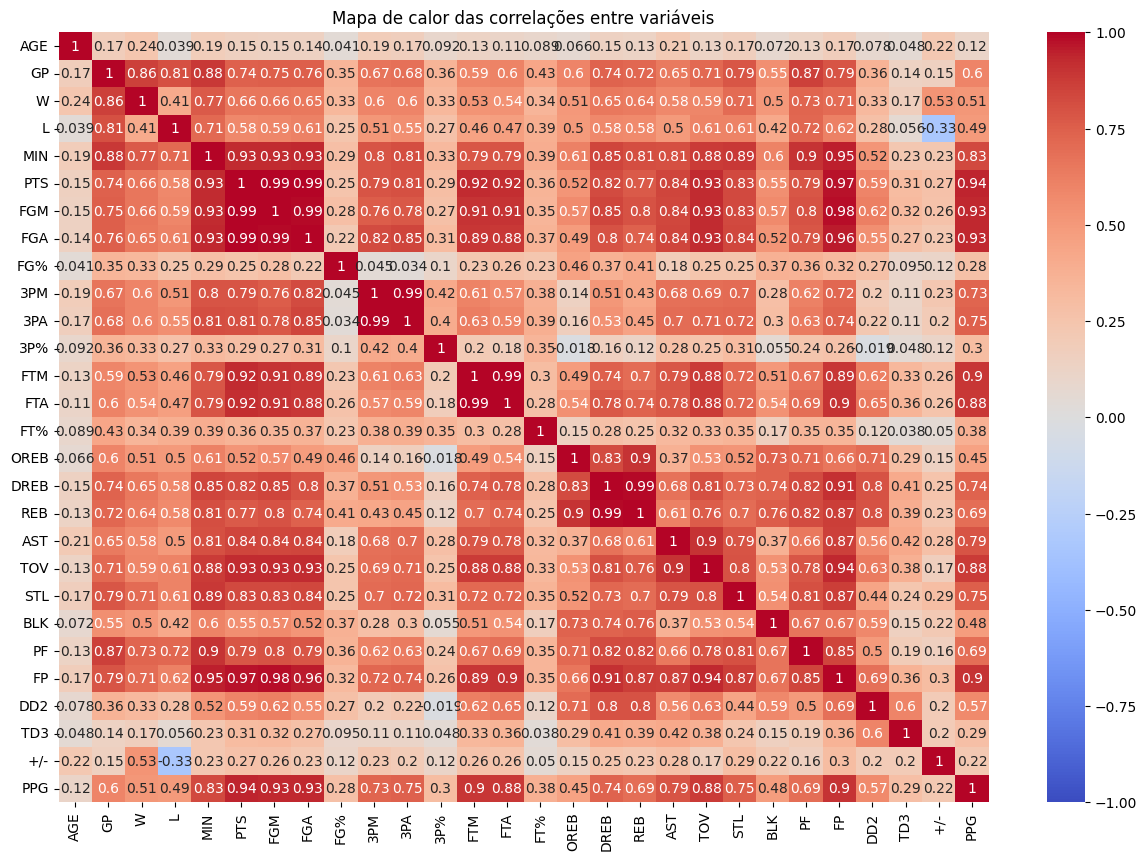

In [ ]:
corr = df3.drop(['PLAYER', 'TEAMID', 'TEAM', 'PPG_DIS'], axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor das correlações entre variáveis')
plt.show()

Pelo mapa de calor, podemos observar que a maioria das variáveis possui correlação positiva alta ou moderada entre si. Esse comportamento é esperado, visto que muitas das variáveis do dataset derivam de outras. Por exemplo, Offensive Rebounds (OREB) e Defensive Rebounds (DREB) são diretamente ligadas a Rebounds (REB).

Por conta disso, decidimos fazer uma análise utilizando Pairplots com o par de variáveis que mostrou a menor correlação: L e +/-, as quais correspondem a uma correlação de -0.33.

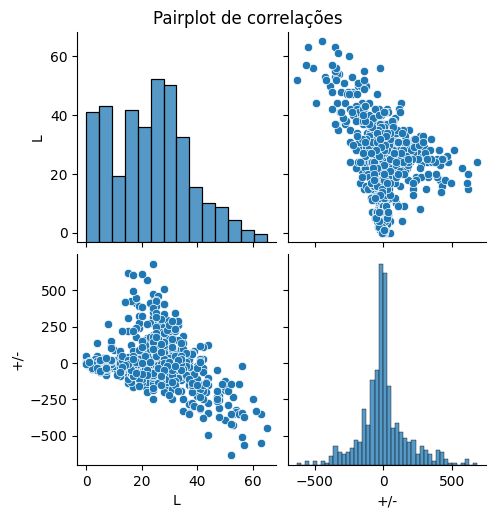

In [ ]:
sns.pairplot(df, vars=['L', '+/-'])
plt.suptitle('Pairplot de correlações', y=1.02)
plt.show()

O histograma do 2º quadrante indica uma assimetria à direita na variável L, enquanto que o histograma do 4º quadrante indica uma distribuição próxima do normal na variável +/-.

Já nos gráficos de dispersão nos quadrantes 1 e 3, as curvas descendentes comprovam a correlação negativa entre as variáveis, indicando que quando uma sobe, a outra desce e vice-versa.

Essa análise condiz com o significado das variáveis, pois L indica o número de partidas em que o time do jogador perdeu e o +/- indica o saldo de pontos, ou seja, a diferença entre os pontos feitos pelo time do jogador e o time adversário. Se existem mais perdas, então a maioria dos saldos são negativos.

### Testes de Hipótese

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

#### Existe diferença relevante entre a taxa de Rebotes Ofensivos e Defensivos do Sacramento Kings?

Aqui veriricamos se a diferença entre as colunas segue a gaussiana

In [ ]:
df_normalized['REB_DIF'] = df_normalized['DREB'] - df_normalized['OREB']

<Axes: ylabel='Frequency'>

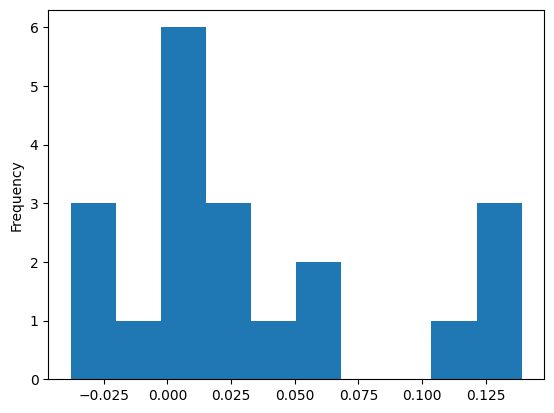

In [ ]:
df_normalized[df_normalized['TEAM'] == 'SAC']['REB_DIF'].plot(kind='hist')

Como o pvalue foi abaixo do valor de significância, a hipotese nula foi rejeitada, e vemos que a população não é normalmente distribuida

In [ ]:
stats.shapiro(df_normalized[df_normalized['TEAM'] == 'SAC']['REB_DIF'])

ShapiroResult(statistic=0.8663716912269592, pvalue=0.01015107799321413)

Usamos neste caso o teste Mannwhitney, e como p pvalue foi acima do valor de significância, não rejeitamos a hipótese nula.

Nesse caso as populações tem a mesma distribuição

In [ ]:
stats.mannwhitneyu(df_normalized[df_normalized['TEAM'] == 'SAC']['DREB'],df_normalized[df_normalized['TEAM'] == 'SAC']['OREB'])

MannwhitneyuResult(statistic=227.0, pvalue=0.4734183711711708)

#### Existe diferença de pontuação "relevante" entre as equipes finalistas durante a temporada regular?

<Axes: ylabel='Frequency'>

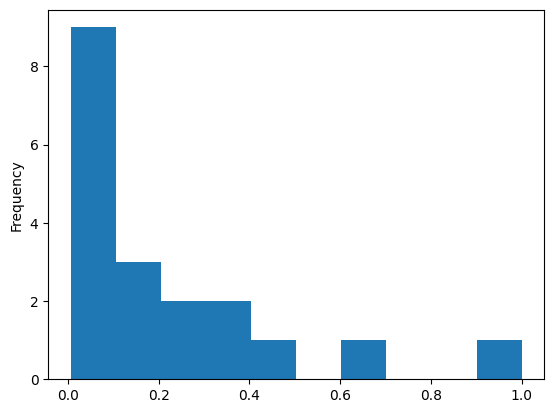

In [ ]:
df_normalized[df_normalized['TEAM'] == 'DAL']['PTS'].plot(kind='hist')

In [ ]:
stats.shapiro(df_normalized[df_normalized['TEAM'] == 'DAL']['PTS'])

ShapiroResult(statistic=0.8071427941322327, pvalue=0.0014539515832439065)

<Axes: ylabel='Frequency'>

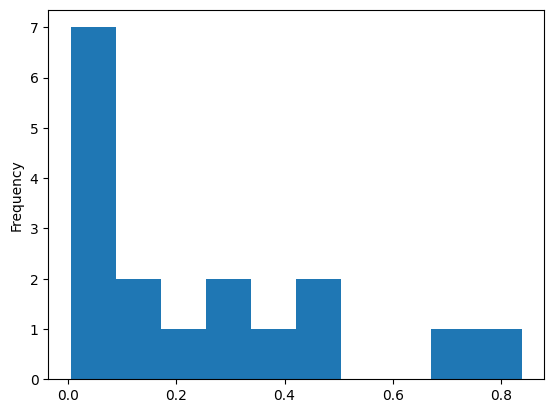

In [ ]:
df_normalized[df_normalized['TEAM'] == 'BOS']['PTS'].plot(kind='hist')

In [ ]:
stats.shapiro(df_normalized[df_normalized['TEAM'] == 'BOS']['PTS'])

ShapiroResult(statistic=0.8732409477233887, pvalue=0.024748407304286957)

Como p pvalue foi acima do valor de significância, não rejeitamos a hipótese nula.

Nesse caso as populações tem a mesma distribuição

In [ ]:
stats.mannwhitneyu(df_normalized[df_normalized['TEAM'] == 'DAL']['PTS'],df_normalized[df_normalized['TEAM'] == 'BOS']['PTS'])

MannwhitneyuResult(statistic=148.0, pvalue=0.6803071218624406)

#### Existe diferença relevante entre a taxa de arremesos convertidos de 3PM do melhor time mais vitorioso e o menos vitorioso?

<Axes: ylabel='Frequency'>

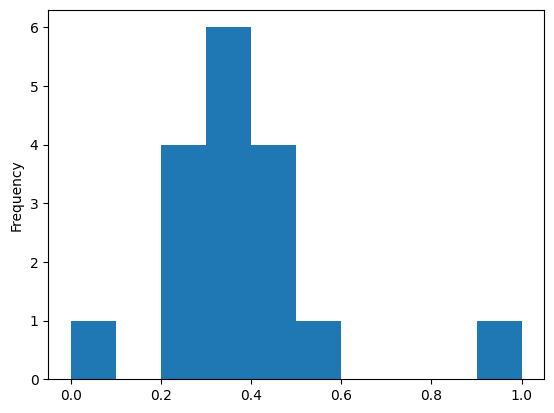

In [ ]:
df_normalized[df_normalized['TEAM'] == 'BOS']['3P%'].plot(kind='hist')

In [ ]:
stats.shapiro(df_normalized[df_normalized['TEAM'] == 'BOS']['3P%'])

ShapiroResult(statistic=0.8308583498001099, pvalue=0.005550635512918234)

<Axes: ylabel='Frequency'>

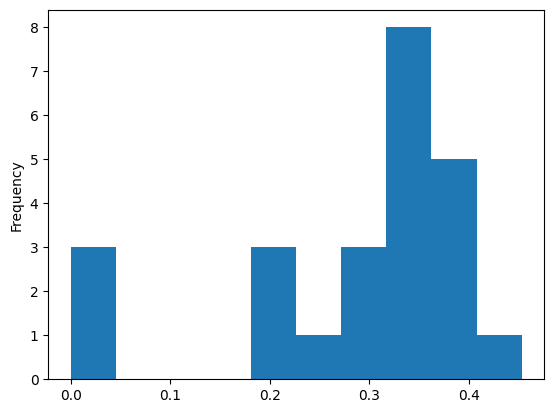

In [ ]:
df_normalized[df_normalized['TEAM'] == 'DET']['3P%'].plot(kind='hist')

In [ ]:
stats.shapiro(df_normalized[df_normalized['TEAM'] == 'DET']['3P%'])

ShapiroResult(statistic=0.8239562511444092, pvalue=0.0007455289014615119)

Como p pvalue foi acima do valor de significância, não rejeitamos a hipótese nula.

Nesse caso as populações tem a mesma distribuição

In [ ]:
stats.mannwhitneyu(df_normalized[df_normalized['TEAM'] == 'BOS']['3P%'],df_normalized[df_normalized['TEAM'] == 'DET']['3P%'])

MannwhitneyuResult(statistic=287.5, pvalue=0.0279530171822616)

### Análises preliminares

#### Quem é o jogador que mais pontua?

In [ ]:
df3.iloc[df3['3P%'].idxmax()]

AGE                  28.0
GP                   63.0
W                    48.0
L                    15.0
MIN                 983.3
PTS                 334.0
FGM                 142.0
FGA                 203.0
FG%                  70.0
3PM                   1.0
3PA                   1.0
3P%                 100.0
FTM                  49.0
FTA                  54.0
FT%                  90.7
OREB                118.0
DREB                143.0
REB                 261.0
AST                  67.0
TOV                  21.0
STL                  23.0
BLK                  61.0
PF                   77.0
FP                  979.0
DD2                   1.0
TD3                   0.0
+/-                 218.0
TEAMID                2.0
PPG              5.301587
PLAYER        Luke Kornet
TEAM                  BOS
PPG_DIS    (3.469, 6.938]
REB_DIF              25.0
Name: 46, dtype: object

#### Quem é o jogador que menos pontua e qual sua média de pontos por jogo?

In [ ]:
df3.iloc[df3.PTS.idxmax()]

AGE                    25.0
GP                     70.0
W                      46.0
L                      24.0
MIN                  2624.0
PTS                  2370.0
FGM                   804.0
FGA                  1652.0
FG%                    48.7
3PM                   284.0
3PA                   744.0
3P%                    38.2
FTM                   478.0
FTA                   608.0
FT%                    78.6
OREB                   59.0
DREB                  588.0
REB                   647.0
AST                   686.0
TOV                   282.0
STL                    99.0
BLK                    38.0
PF                    149.0
FP                   4304.0
DD2                    49.0
TD3                    21.0
+/-                   319.0
TEAMID                  6.0
PPG               33.857143
PLAYER          Luka Doncic
TEAM                    DAL
PPG_DIS    (31.223, 34.692]
REB_DIF               529.0
Name: 124, dtype: object

#### Qual jogador mais jogou em minutos?

In [ ]:
df3.iloc[df3.MIN.idxmax()]

#### Qual a média de minutos jogados por partida para esse jogador?

In [ ]:
df3.MIN.iloc[df3.MIN.idxmax()] / df3.GP.iloc[df3.MIN.idxmax()]

### Outliers usando LOG

##### Z score robusto

In [ ]:
df['REB'].replace(0, np.nan)

0      0.016071
1      0.242857
2      0.172321
3      0.692857
4      0.198214
         ...   
566    0.055357
567    0.278571
568    0.109821
569    0.162500
570    0.032143
Name: REB, Length: 571, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

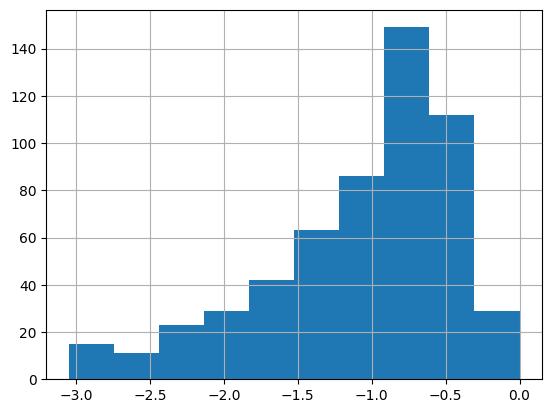

In [ ]:
from numpy import log10

df3['REB_LOG'] = log10(df3['REB'])
df3['REB_LOG'].replace([np.inf, -np.inf], np.nan, inplace=True)
df3['REB_LOG'].hist()

In [ ]:
df3['REB'].replace(np.nan, 0)

0      0.016071
1      0.242857
2      0.172321
3      0.692857
4      0.198214
         ...   
566    0.055357
567    0.278571
568    0.109821
569    0.162500
570    0.032143
Name: REB, Length: 571, dtype: float64

In [ ]:
from numpy import abs
mad = abs(df3['REB_LOG'] - df3['REB_LOG'].median()).median()*(1/0.6745)
print(mad)

0.5339532213234067


In [ ]:
(df3['REB_LOG']-df3['REB_LOG'].mean()).abs().mean()

0.5125749131779875

<Axes: >

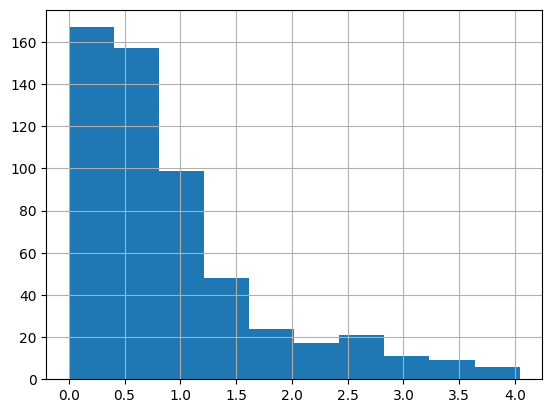

In [ ]:
(abs(df3['REB_LOG']-df3['REB_LOG'].median())/mad).hist()

In [ ]:
df3[abs(df3['REB_LOG']-df3['REB_LOG'].median())/mad > 3.5][['PLAYER', 'TEAM', 'REB']].sort_values(by=['REB'], ascending = False)

,PLAYER,TEAM,REB
38,Drew Peterson,BOS,1
110,Ty Jerome,CLE,1
231,Joshua Primo,LAC,1
287,Alondes Williams,MIA,1
356,Kaiser Gates,NOP,1
481,Filip Petrusev,SAC,1


##### Turkey

In [ ]:
q1 = df3['REB_LOG'].quantile(q=0.25)
q3 = df3['REB_LOG'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.8141180660029037


In [ ]:
df3[df3['REB_LOG'] < (q1-1.5*iqr)]

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,TEAMID,PPG,PLAYER,TEAM,PPG_DIS,REB_LOG
38,24.0,3.0,3.0,0.0,22.7,11.0,4.0,6.0,66.7,3.0,...,19.0,0.0,0.0,8.0,2.0,3.666667,Drew Peterson,BOS,"(3.469, 6.938]",0.00000
110,26.0,2.0,1.0,1.0,14.8,4.0,2.0,4.0,50.0,0.0,...,9.0,0.0,0.0,-14.0,5.0,2.000000,Ty Jerome,CLE,"(-0.0347, 3.469]",0.00000
231,21.0,2.0,2.0,0.0,10.3,2.0,1.0,3.0,33.3,0.0,...,2.0,0.0,0.0,-1.0,12.0,1.000000,Joshua Primo,LAC,"(-0.0347, 3.469]",0.00000
279,30.0,3.0,1.0,2.0,6.0,2.0,1.0,2.0,50.0,0.0,...,7.0,0.0,0.0,-11.0,14.0,0.666667,Shaquille Harrison,MEM,"(-0.0347, 3.469]",0.30103
287,24.0,7.0,5.0,2.0,15.6,5.0,2.0,8.0,25.0,0.0,...,7.0,0.0,0.0,-20.0,15.0,0.714286,Alondes Williams,MIA,"(-0.0347, 3.469]",0.00000
350,24.0,1.0,1.0,0.0,3.4,4.0,2.0,5.0,40.0,0.0,...,6.0,0.0,0.0,3.0,18.0,4.000000,Izaiah Brockington,NOP,"(3.469, 6.938]",0.30103
356,27.0,1.0,0.0,1.0,7.4,0.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,-2.0,18.0,0.000000,Kaiser Gates,NOP,"(-0.0347, 3.469]",0.00000
364,27.0,8.0,2.0,6.0,37.3,6.0,2.0,10.0,20.0,2.0,...,12.0,0.0,0.0,-6.0,19.0,0.750000,Charlie Brown Jr.,NYK,"(-0.0347, 3.469]",0.30103
411,26.0,2.0,1.0,1.0,6.0,4.0,2.0,3.0,66.7,0.0,...,7.0,0.0,0.0,0.0,21.0,2.000000,Kevon Harris,ORL,"(-0.0347, 3.469]",0.30103
419,28.0,2.0,1.0,1.0,15.5,7.0,4.0,6.0,66.7,2.0,...,21.0,0.0,0.0,2.0,22.0,2.020833,D.J. Wilson,PHI,"(-0.0347, 3.469]",0.30103


In [ ]:
df3[df3['REB_LOG'] > (q3+1.5*iqr)]

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,FP,DD2,TD3,+/-,TEAMID,PPG,PLAYER,TEAM,PPG_DIS,REB_LOG
